In [1]:
# 라이브러리 사용
import tensorflow as tf
import pandas as pd

In [2]:
# 1.과거의 데이터를 준비합니다.
파일경로 = 'https://raw.githubusercontent.com/blackdew/tensorflow1/master/csv/boston.csv'
보스턴 = pd.read_csv(파일경로)
print(보스턴.columns)
보스턴.head()

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
# 독립변수, 종속변수 분리 
독립 = 보스턴[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
            'ptratio', 'b', 'lstat']]
종속 = 보스턴[['medv']]
print(독립.shape, 종속.shape)

(506, 13) (506, 1)


In [6]:
# 2. 모델의 구조를 만듭니다
X = tf.keras.layers.Input(shape=[13])
Y = tf.keras.layers.Dense(1)(X)
model = tf.keras.models.Model(X, Y)
model.compile(loss='mse')

In [7]:
# 3.데이터로 모델을 학습(FIT)합니다.
model.fit(독립, 종속, epochs=1000, verbose=0)
model.fit(독립, 종속, epochs=10)

Epoch 1/10
16/16 [==============================] - 0s 2ms/step - loss: 26.2420
Epoch 2/10
16/16 [==============================] - 0s 3ms/step - loss: 27.1625
Epoch 3/10
16/16 [==============================] - 0s 3ms/step - loss: 26.2928
Epoch 4/10
16/16 [==============================] - 0s 3ms/step - loss: 26.6805
Epoch 5/10
16/16 [==============================] - 0s 2ms/step - loss: 26.6592
Epoch 6/10
16/16 [==============================] - 0s 2ms/step - loss: 26.5371
Epoch 7/10
16/16 [==============================] - 0s 3ms/step - loss: 25.9221
Epoch 8/10
16/16 [==============================] - 0s 3ms/step - loss: 26.5842
Epoch 9/10
16/16 [==============================] - 0s 4ms/step - loss: 26.1108
Epoch 10/10
16/16 [==============================] - 0s 4ms/step - loss: 26.5846


In [17]:
# 4. 모델을 이용합니다
리스트 = model.predict(독립[0:100])
리스트_학습후 = model.predict(독립[5:10])
print(리스트_학습후)
# 종속변수 확인
리스트_원본 = 종속[5:10]
print(리스트_원본)

1/1 [==============================] - 0s 38ms/step
[[25.85626 ]
 [20.580433]
 [17.478584]
 [ 8.864517]
 [17.080088]]
   medv
5  28.7
6  22.9
7  27.1
8  16.5
9  18.9


In [9]:
# 모델의 수식 확인
print(model.get_weights())

[array([[-0.09108285],
       [ 0.07446852],
       [-0.05439785],
       [ 3.2850933 ],
       [ 1.1584991 ],
       [ 4.00355   ],
       [ 0.01627088],
       [-0.91132414],
       [ 0.14643593],
       [-0.00991022],
       [ 0.04100083],
       [ 0.01541929],
       [-0.57766587]], dtype=float32), array([2.2003117], dtype=float32)]


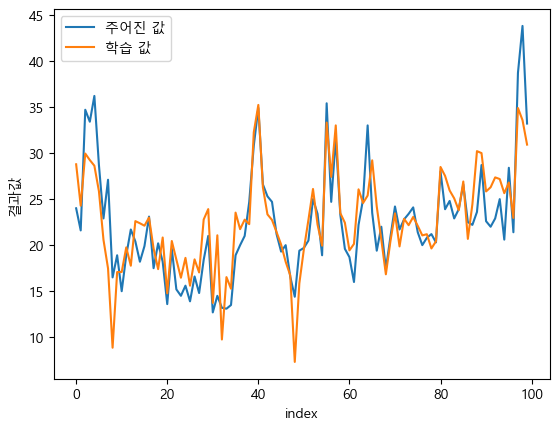

In [19]:
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.plot(종속[0:100], label="주어진 값") 
plt.plot(리스트, label="학습 값")
plt.xlabel('index')
plt.ylabel('결과값')
plt.legend()
plt.show()